In [ ]:
import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00


## Read the data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("EV_Dataset.csv")

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Aggregate sales data monthly
df_time_series = df.groupby('Date')['EV_Sales_Quantity'].sum().reset_index()

# Sort by date
df_time_series = df_time_series.sort_values('Date')

# Save cleaned data
df_time_series.to_csv("Cleaned_EV_Data.csv", index=False)
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0000,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0000
1,2014.0000,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0000
2,2014.0000,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0000
3,2014.0000,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0000
4,2014.0000,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0000


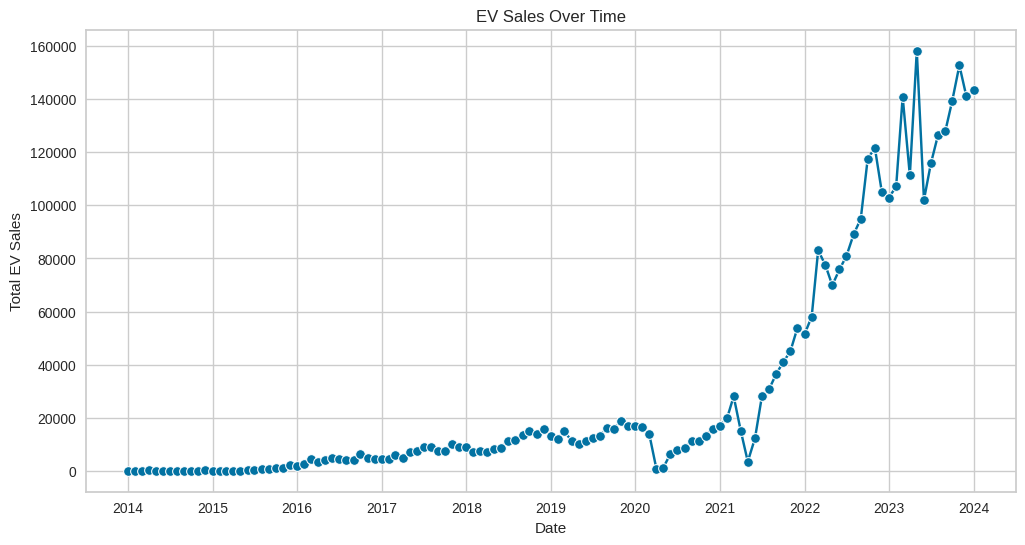

ADF Statistic: 1.0556991796581225
P-Value: 0.9948202210788346


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Plot EV sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_time_series['Date'], y=df_time_series['EV_Sales_Quantity'], marker="o")
plt.title("EV Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total EV Sales")
plt.grid(True)
plt.show()

# ADF Test for Stationarity
adf_test = adfuller(df_time_series['EV_Sales_Quantity'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")


In [ ]:
# Extract time-based features
df_time_series["Year"] = df_time_series["Date"].dt.year
df_time_series["Month"] = df_time_series["Date"].dt.month
df_time_series["Quarter"] = df_time_series["Date"].dt.quarter

# Differencing if needed
df_time_series['Sales_Diff'] = df_time_series['EV_Sales_Quantity'].diff().fillna(0)

# Save processed data
df_time_series.to_csv("Processed_EV_Data.csv", index=False)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(df_time_series['EV_Sales_Quantity'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)  # Predict next 12 months
print(forecast)


121   141907.8333
122   142541.1056
123   142226.3636
124   142382.7932
125   142305.0463
126   142343.6872
127   142324.4823
128   142334.0273
129   142329.2833
130   142331.6411
131   142330.4693
132   142331.0517
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.1388
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1037
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0552
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0534
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0296
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0170
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0117
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0172
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0122
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0132
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0080
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0095
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0071
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0084
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0076
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

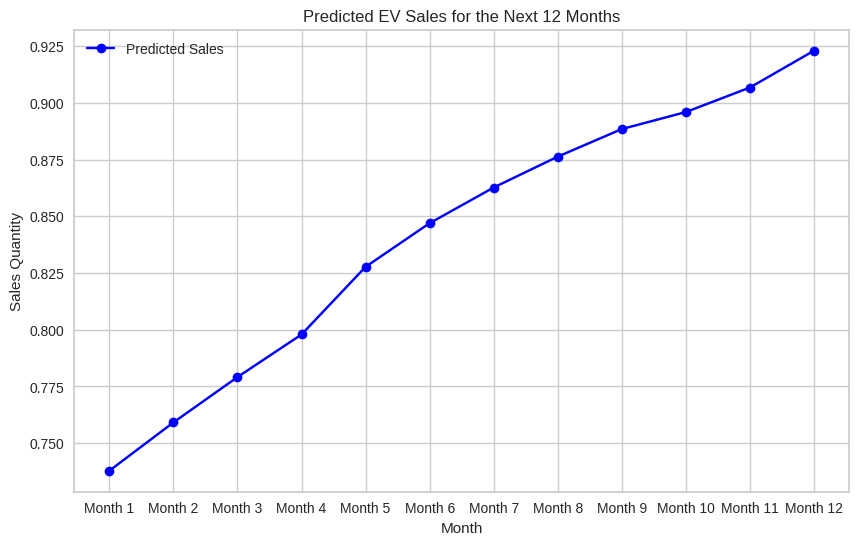

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_time_series['EV_Sales_Quantity'] = scaler.fit_transform(df_time_series[['EV_Sales_Quantity']])

# Prepare data for LSTM
X, y = [], []
for i in range(12, len(df_time_series)):
    X.append(df_time_series['EV_Sales_Quantity'][i-12:i])
    y.append(df_time_series['EV_Sales_Quantity'][i])

X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(12, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=16, verbose=1)

# Predict next 12 months
predicted_sales = model.predict(X[-12:])
print(predicted_sales)
# Generate a range for the next 12 months
months = np.arange(1, 13)

# Create the graph of predicted sales
plt.figure(figsize=(10, 6))
plt.plot(months, predicted_sales, marker='o', label='Predicted Sales', color='blue')
plt.title('Predicted EV Sales for the Next 12 Months')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.xticks(months, [f'Month {i}' for i in months])
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Evaluate ARIMA
arima_mae = mean_absolute_error(df_time_series['EV_Sales_Quantity'][-12:], forecast)

# Evaluate LSTM
lstm_mae = mean_absolute_error(df_time_series['EV_Sales_Quantity'][-12:], predicted_sales)

print(f"ARIMA MAE: {arima_mae}")
print(f"LSTM MAE: {lstm_mae}")

# Save best model
if lstm_mae < arima_mae:
    model.save("EV_LSTM_Model.h5")
else:
    model_fit.save("EV_ARIMA_Model.pkl")


ARIMA MAE: 142306.4905007422
LSTM MAE: 0.08406225853468292


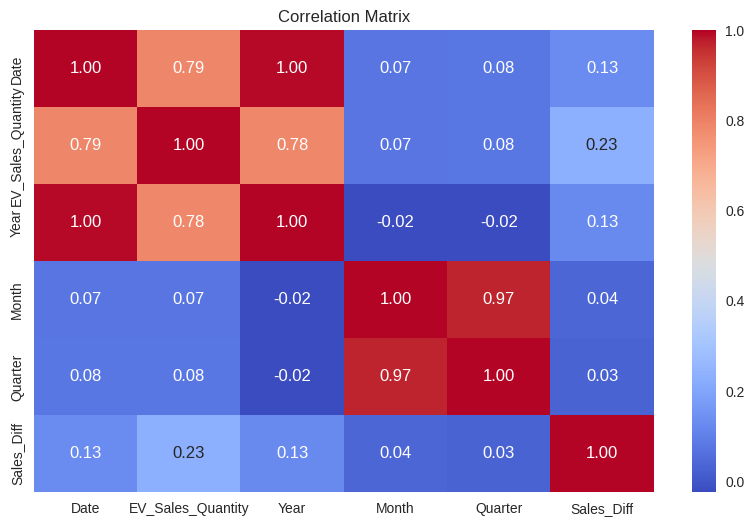

In [ ]:


# Feature Engineering
df_time_series["Year"] = df_time_series["Date"].dt.year
df_time_series["Month"] = df_time_series["Date"].dt.month
df_time_series["Quarter"] = df_time_series["Date"].dt.quarter
df_time_series['Sales_Diff'] = df_time_series['EV_Sales_Quantity'].diff().fillna(0)

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_time_series.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()




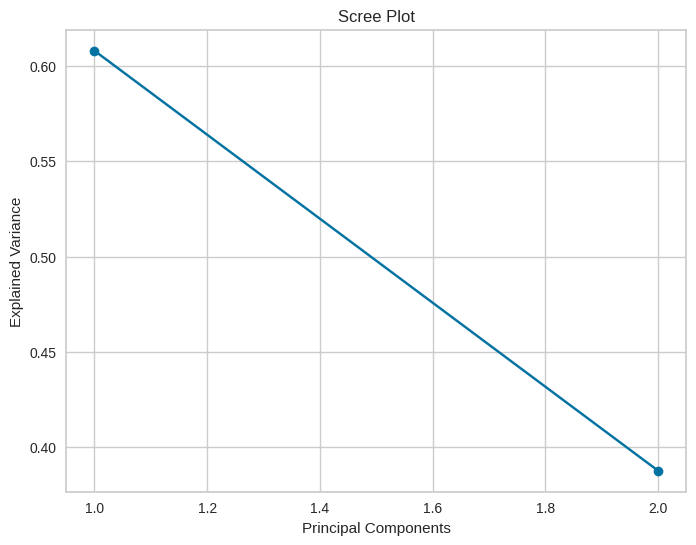

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_time_series.drop(columns=['Date']))

# Explained variance ratio (used for scree plot)
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()


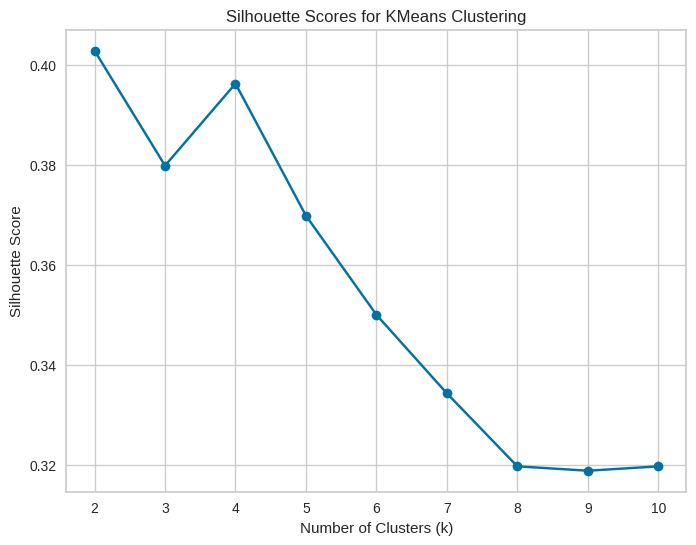

In [ ]:
# Step 2: KMeans Clustering with different number of clusters
sil_scores = []
k_range = range(2, 11)  # Test from 2 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_components)
    sil_score = silhouette_score(pca_components, cluster_labels)
    sil_scores.append(sil_score)
    # Plot Silhouette Scores for each k
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o', color='b')
plt.title("Silhouette Scores for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Optimal number of clusters: 2


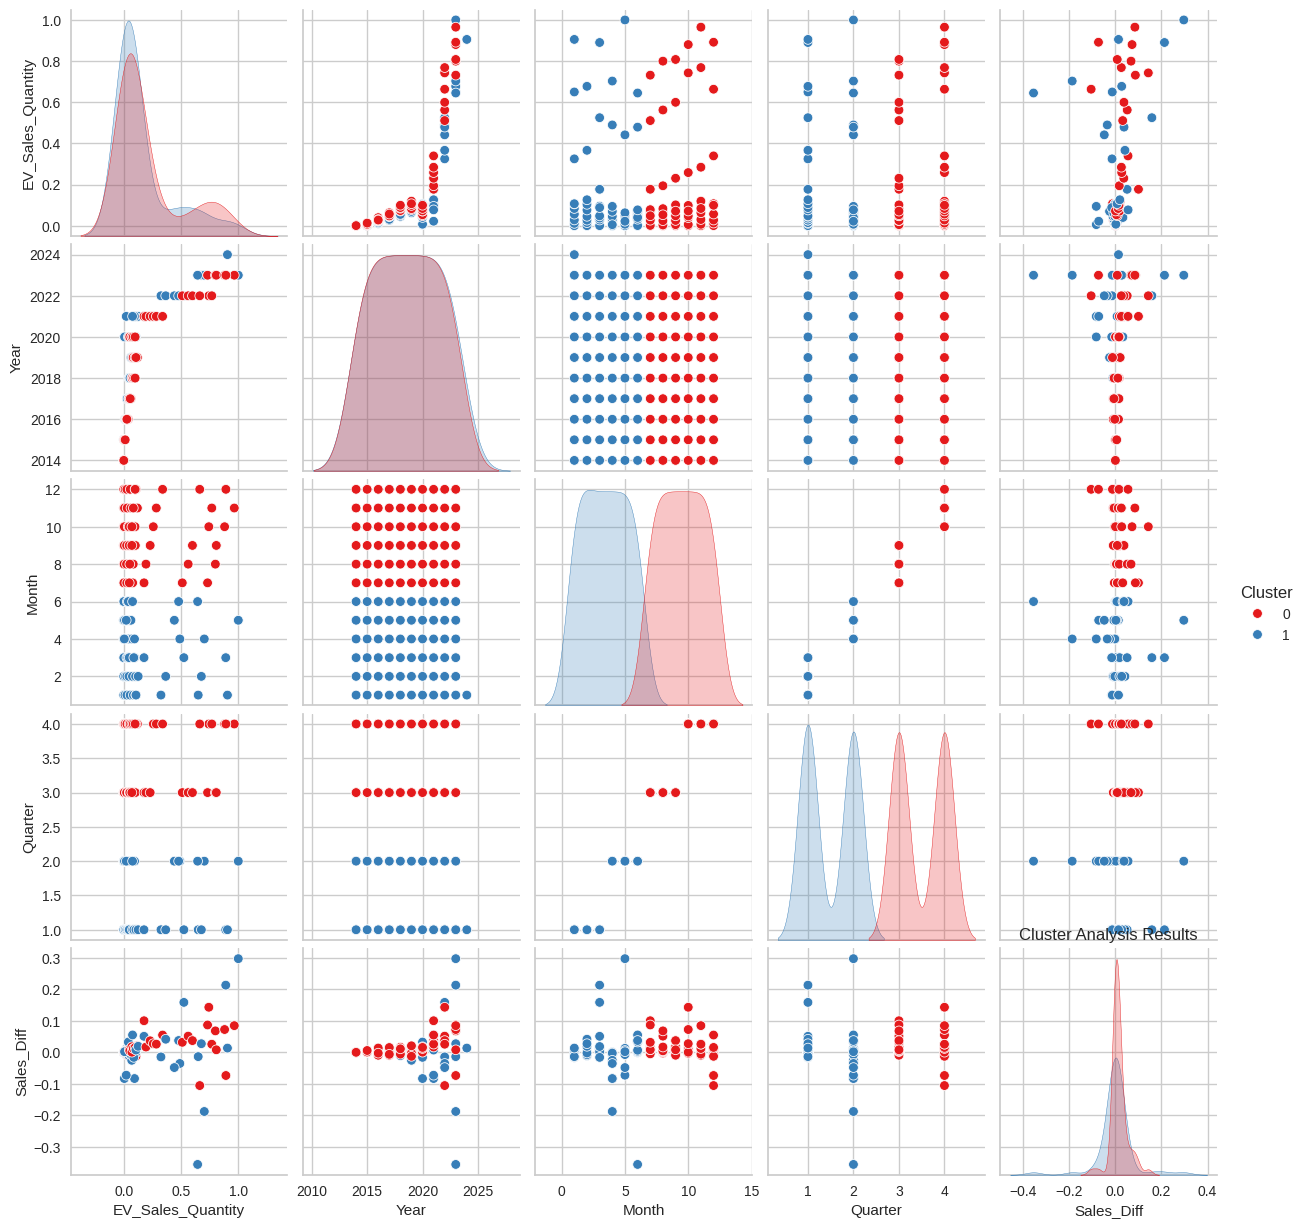

In [ ]:



# Final Clustering with Optimal k (choose the k with highest silhouette score)
optimal_k = k_range[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Apply KMeans with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_time_series['Cluster'] = final_kmeans.fit_predict(pca_components)

# Show final clustering results
sns.pairplot(df_time_series, hue='Cluster', palette='Set1', diag_kind='kde')
plt.title("Cluster Analysis Results")
plt.show()

<ipython-input-21-c7d9c995ffbf>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




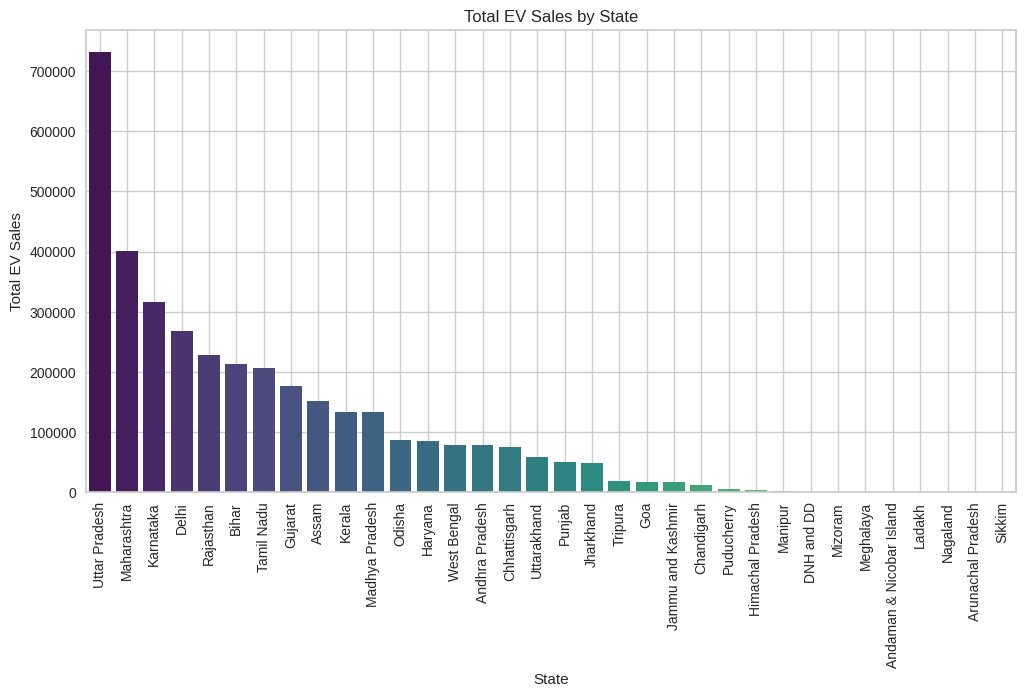

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("EV_Dataset.csv")

# Aggregate the total EV sales by state
state_sales = df.groupby('State', as_index=False)['EV_Sales_Quantity'].sum()

# Sort the data by sales quantity
state_sales_sorted = state_sales.sort_values(by='EV_Sales_Quantity', ascending=False)

# Plot the total EV sales per state
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='EV_Sales_Quantity', data=state_sales_sorted, palette='viridis')
plt.title("Total EV Sales by State")
plt.xlabel("State")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()


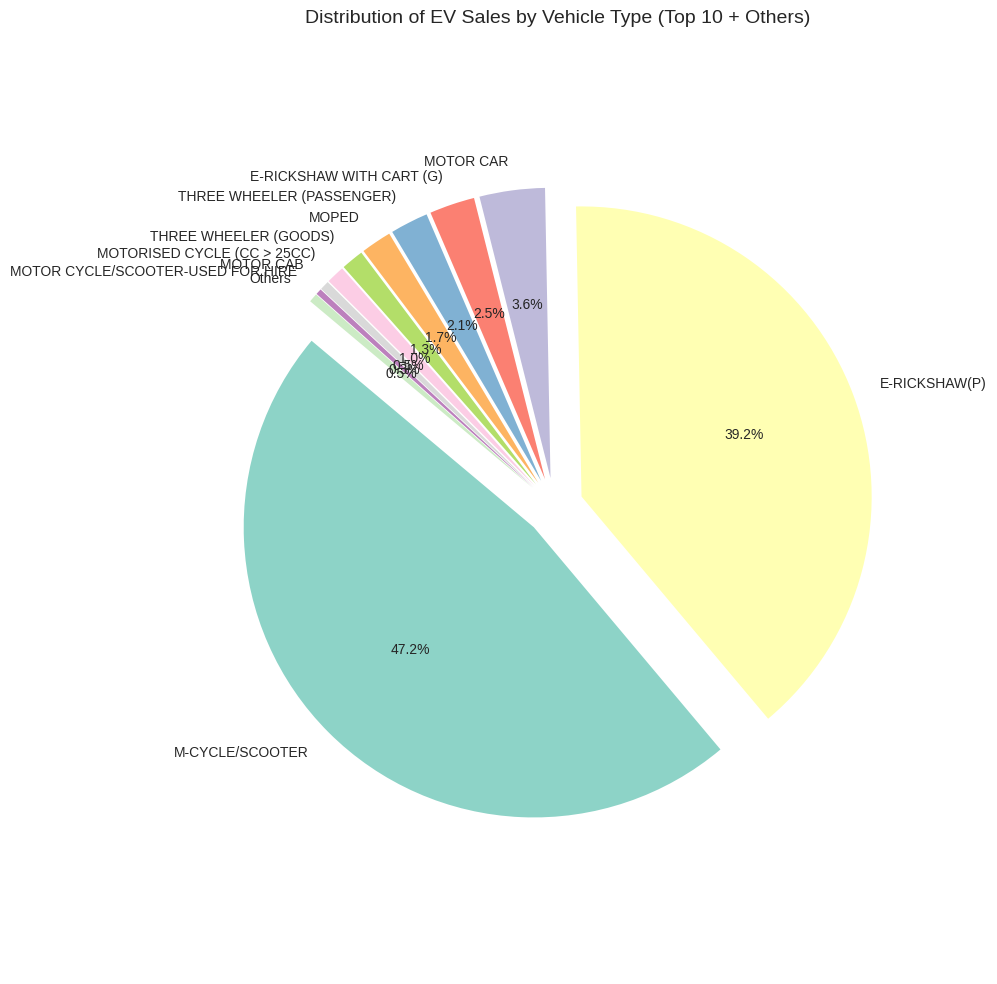

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("EV_Dataset.csv")  # Update the path if needed

# Group by 'Vehicle_Class' and aggregate total sales
vehicle_sales_by_class = df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().reset_index()

# Sort the data and calculate the cumulative percentage
vehicle_sales_by_class = vehicle_sales_by_class.sort_values(by='EV_Sales_Quantity', ascending=False)
vehicle_sales_by_class['Percentage'] = (vehicle_sales_by_class['EV_Sales_Quantity'] /
                                        vehicle_sales_by_class['EV_Sales_Quantity'].sum()) * 100

# Keep the top 10 vehicle classes and group the rest as 'Others'
top_n = 10
top_vehicle_sales = vehicle_sales_by_class[:top_n]
others = pd.DataFrame({
    'Vehicle_Class': ['Others'],
    'EV_Sales_Quantity': [vehicle_sales_by_class[top_n:]['EV_Sales_Quantity'].sum()]
})
vehicle_sales_by_class = pd.concat([top_vehicle_sales, others])

# Plot pie chart
plt.figure(figsize=(10, 10))
explode = [0.1] * len(vehicle_sales_by_class)  # Explode all slices slightly

plt.pie(
    vehicle_sales_by_class['EV_Sales_Quantity'],
    labels=vehicle_sales_by_class['Vehicle_Class'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3", len(vehicle_sales_by_class)),
    explode=explode,
    textprops={'fontsize': 10}
)

plt.title("Distribution of EV Sales by Vehicle Type (Top 10 + Others)", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()


Total vehicle demand (including non-EVs) across categories or regions.


<ipython-input-18-3903f41db2e6>:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-18-3903f41db2e6>:18: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



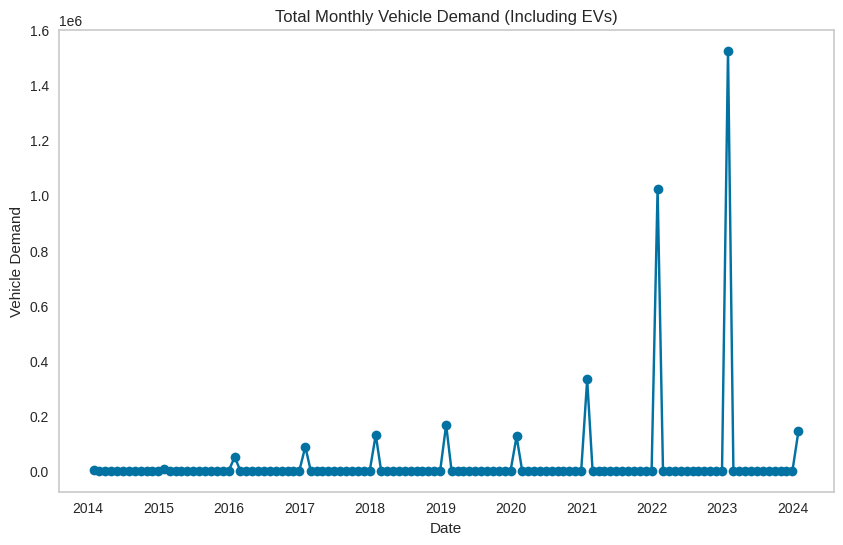

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



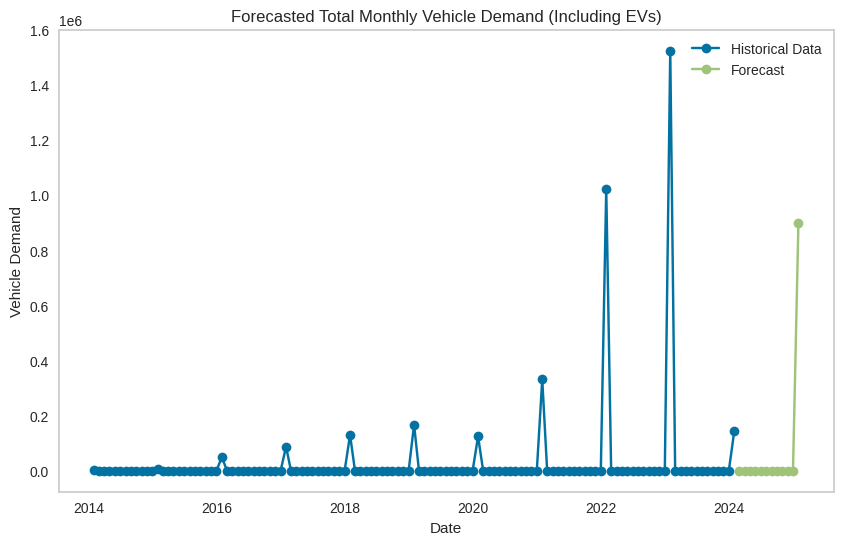

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset

data = pd.read_csv("EV_Dataset.csv")

# Convert the 'Date' column to datetime and ensure it's sorted
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.sort_values('Date', inplace=True)

# Aggregate data to monthly total vehicle demand (including EVs and non-EVs)
monthly_demand = data.groupby(pd.Grouper(key='Date', freq='M'))['EV_Sales_Quantity'].sum().reset_index()

# Ensure there are no missing months
monthly_demand.set_index('Date', inplace=True)
monthly_demand = monthly_demand.asfreq('M', fill_value=0)

# Plot the total vehicle demand time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand.index, monthly_demand['EV_Sales_Quantity'], marker='o')
plt.title("Total Monthly Vehicle Demand (Including EVs)")
plt.xlabel("Date")
plt.ylabel("Vehicle Demand")
plt.grid()
plt.show()

# Build a time-series forecasting model (Holt-Winters Exponential Smoothing)
model = ExponentialSmoothing(
    monthly_demand['EV_Sales_Quantity'],
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast for the next 12 months
forecast = model.forecast(steps=12)

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand.index, monthly_demand['EV_Sales_Quantity'], label="Historical Data", marker='o')
plt.plot(forecast.index, forecast, label="Forecast", marker='o')
plt.title("Forecasted Total Monthly Vehicle Demand (Including EVs)")
plt.xlabel("Date")
plt.ylabel("Vehicle Demand")
plt.legend()
plt.grid()
plt.show()


FORECASTING MODEL

In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00


ADF Statistic: 1.0556991796581225
p-value: 0.9948202210788346
Data is non-stationary, applying differencing...


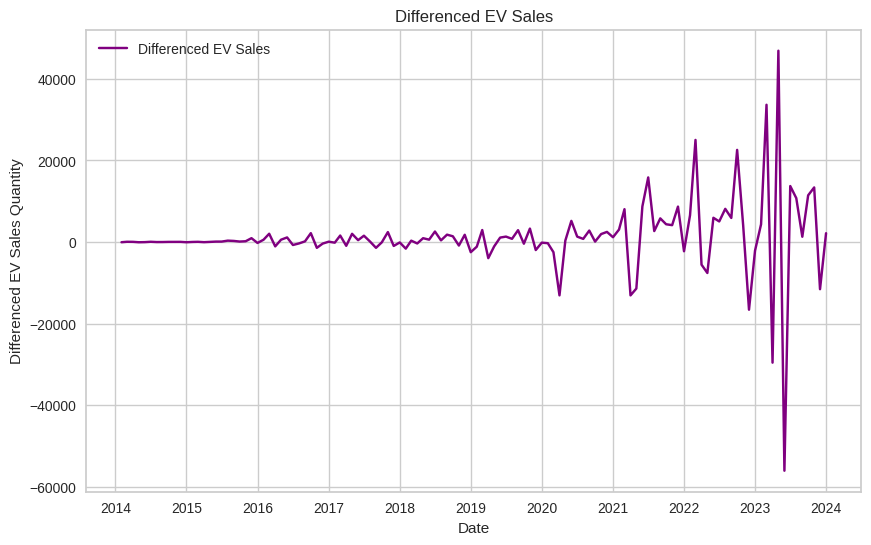

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=2483.317, Time=4.50 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=2649.303, Time=0.05 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=2553.500, Time=1.40 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=2.55 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=2481.421, Time=5.03 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=2491.741, Time=1.63 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=2483.279, Time=10.05 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=2484.173, Time=4.70 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=2484.921, Time=11.05 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=2481.231, Time=1.43 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=2493.403, Time=1.24 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=2482.993, Time=1.87 sec
 ARIMA(1,2,2)(0,0,2)[12]             : AIC=2482.920, Time=1.91 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=2484.691, Time=0.43 sec
 ARIMA(1,2,2)(1,0,2)[1

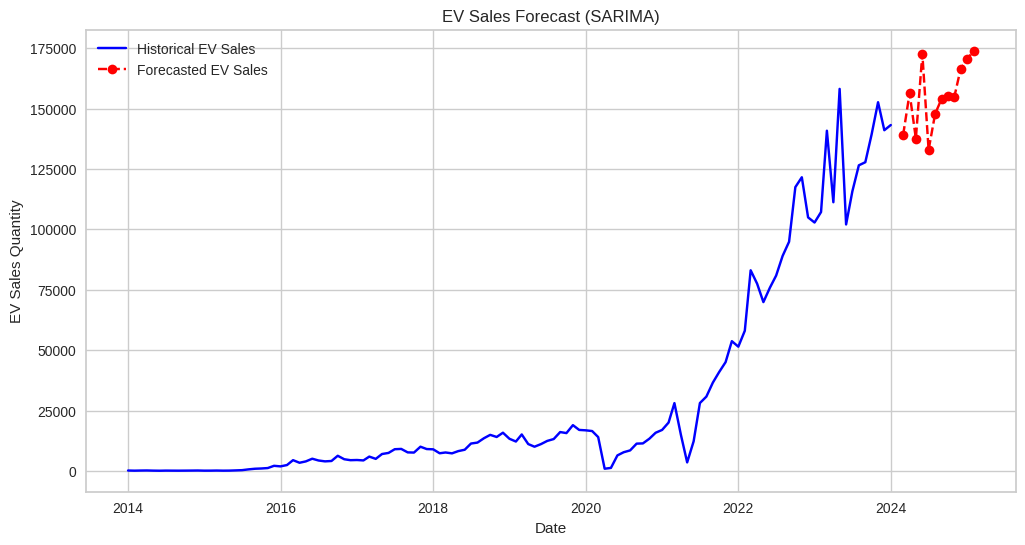


Forecasted EV Sales for Next 12 Months:
         Date  Forecasted_EV_Sales
0  2024-02-29          139027.1961
1  2024-03-31          156356.4489
2  2024-04-30          137597.2100
3  2024-05-31          172688.7915
4  2024-06-30          132892.1094
5  2024-07-31          147710.4973
6  2024-08-31          154015.4410
7  2024-09-30          155282.6962
8  2024-10-31          154755.3486
9  2024-11-30          166264.7225
10 2024-12-31          170318.7042
11 2025-01-31          173921.7263


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Suppress future warnings from Scikit-Learn
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset (ensure 'Date' column is in datetime format)
data = pd.read_csv('EV_Dataset.csv')

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregating data by month
data_monthly = data.groupby(data['Date'].dt.to_period('M'))['EV_Sales_Quantity'].sum().reset_index()

# Convert Period to Timestamp for ARIMA
data_monthly['ds'] = data_monthly['Date'].dt.to_timestamp()

# Rename columns for time series analysis
data_monthly = data_monthly.rename(columns={'EV_Sales_Quantity': 'y'})

# Check for stationarity using ADF test
result = adfuller(data_monthly['y'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value is greater than 0.05, the data is non-stationary.
if result[1] > 0.05:
    print("Data is non-stationary, applying differencing...")

    # Apply differencing
    data_monthly['y_diff'] = data_monthly['y'].diff()

    # Remove the first row (NaN created by differencing)
    data_diff = data_monthly.dropna().copy()

    # Plot the differenced data
    plt.figure(figsize=(10, 6))
    plt.plot(data_diff['ds'], data_diff['y_diff'], label='Differenced EV Sales', color='purple')
    plt.title('Differenced EV Sales')
    plt.xlabel('Date')
    plt.ylabel('Differenced EV Sales Quantity')
    plt.legend()
    plt.show()
else:
    print("Data is already stationary.")

# Use Auto ARIMA to determine the best model parameters
stepwise_fit = auto_arima(
    data_monthly['y'],
    seasonal=True,
    m=12,  # Assuming a yearly cycle
    trace=True,
    suppress_warnings=True
)

print("\nBest ARIMA order selected by Auto ARIMA:")
print(stepwise_fit.summary())

# Extract best order from auto_arima
best_order = stepwise_fit.order
best_seasonal_order = stepwise_fit.seasonal_order

# Fit SARIMA model with the best parameters
model = SARIMAX(
    data_monthly['y'],
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit()

# Forecast future EV sales (12 months ahead)
forecast_steps = 12
forecast_index = pd.date_range(start=data_monthly['ds'].max(), periods=forecast_steps + 1, freq='M')[1:]

forecast = model_fit.forecast(steps=forecast_steps)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted_EV_Sales': forecast.values})

# Plot historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(data_monthly['ds'], data_monthly['y'], label='Historical EV Sales', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_EV_Sales'], label='Forecasted EV Sales', color='red', linestyle='dashed', marker='o')
plt.title('EV Sales Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('EV Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values
print("\nForecasted EV Sales for Next 12 Months:")
print(forecast_df)


In [ ]:
data = pd.read_csv("Indian_States_Vehicle_Demand.csv")


In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data: Total EV sales across all states by month
total_ev_sales = data.groupby(pd.Grouper(key='Date', freq='M'))['EV_Sales'].sum().reset_index()

# Ensure there are no missing months
total_ev_sales.set_index('Date', inplace=True)
total_ev_sales = total_ev_sales.asfreq('M', fill_value=0)


# Build a forecasting model (Holt-Winters Exponential Smoothing)
model = ExponentialSmoothing(
    total_ev_sales['EV_Sales'],
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast the next 12 months
forecast = model.forecast(steps=12)

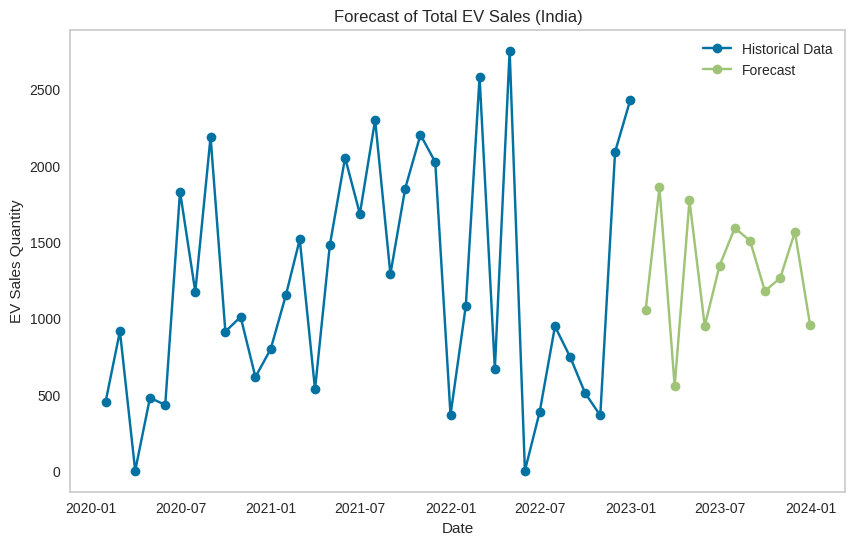

         Date  Forecasted_EV_Sales
0  2023-01-31            1050.9183
1  2023-02-28            1855.8718
2  2023-03-31             553.4172
3  2023-04-30            1772.3167
4  2023-05-31             948.3509
5  2023-06-30            1342.6075
6  2023-07-31            1590.8394
7  2023-08-31            1506.5553
8  2023-09-30            1177.9623
9  2023-10-31            1261.4653
10 2023-11-30            1564.9390
11 2023-12-31             951.5666


In [ ]:
# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(total_ev_sales.index, total_ev_sales['EV_Sales'], label="Historical Data", marker='o')
plt.plot(forecast.index, forecast, label="Forecast", marker='o')
plt.title("Forecast of Total EV Sales (India)")
plt.xlabel("Date")
plt.ylabel("EV Sales Quantity")
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
forecast_df = pd.DataFrame({'Date': forecast.index, 'Forecasted_EV_Sales': forecast.values})
print(forecast_df)

Vehicle Sales Forecasting

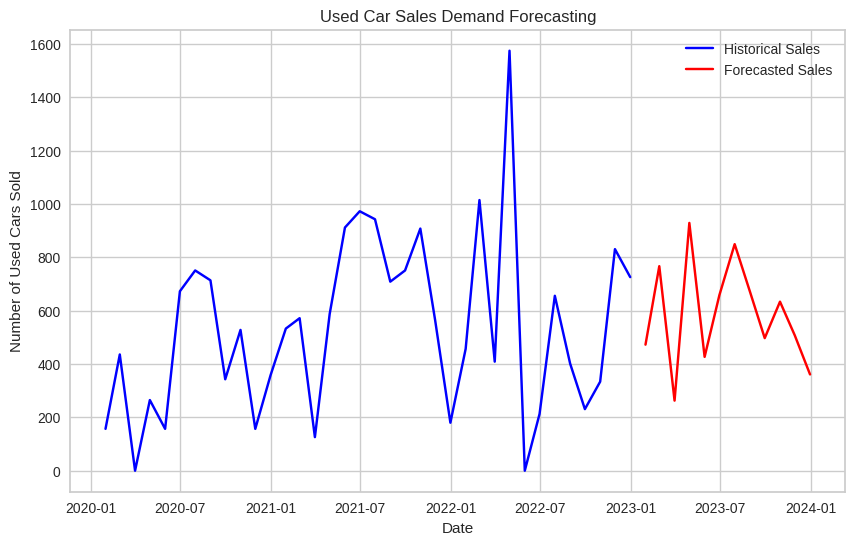

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your dataset
df = pd.read_csv("Indian_States_Vehicle_Demand.csv")

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Aggregate total used car sales by month (use 'Used_Car_Sales' instead of 'Used_Car')
total_used_car_sales = df.resample('M').sum()['Used_Car_Sales']  # Monthly aggregation

# Build the forecasting model (Holt-Winters Exponential Smoothing)
model = ExponentialSmoothing(
    total_used_car_sales,
    seasonal='add',  # Use 'mul' for multiplicative seasonality if needed
    seasonal_periods=12  # Adjust to the number of periods in a year (e.g., 12 for monthly data)
).fit()

# Forecast the next 12 months
forecast = model.forecast(steps=12)

# Plot historical sales and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(total_used_car_sales, label='Historical Sales', color='blue')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Used Car Sales Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Number of Used Cars Sold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("Indian_States_Vehicle_Demand.csv")

# Preprocess the data: Handle missing values and encode categorical variables
data_cleaned = data.dropna()  # Drop rows with missing values

# Encode categorical columns ('Region', 'Vehicle_Type', 'Season')
label_encoders = {}
categorical_columns = ['Region', 'Vehicle_Type', 'Season']
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Define the features (X) and target variable (y)
X = data_cleaned[['Year', 'Month', 'Fuel_Price', 'Charging_Stations', 'Season']]
y = data_cleaned['EV_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 11397.919609999999
R² Score: 0.0290354679710636


Regional Demand Forecasting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("Indian_States_Vehicle_Demand.csv")

# Preprocess the data: Handle missing values and encode categorical variables
data_cleaned = data.dropna()  # Drop rows with missing values

# Encode categorical columns ('Region', 'Vehicle_Type', 'Season')
label_encoders = {}
categorical_columns = ['Region', 'Vehicle_Type', 'Season']
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Define the features (X) and target variable (y)
X = data_cleaned[['Year', 'Month', 'Fuel_Price', 'Charging_Stations', 'Season', 'Region', 'Vehicle_Type']]
y = data_cleaned['Used_Car_Sales']  # Change this to the sales column you want to predict

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Example: Decode predictions back to original labels for interpretation
region_decoder = label_encoders['Region'].inverse_transform(X_test['Region'].astype(int))
vehicle_type_decoder = label_encoders['Vehicle_Type'].inverse_transform(X_test['Vehicle_Type'].astype(int))

# Display some predictions with region and vehicle type
results = pd.DataFrame({
    'Region': region_decoder,
    'Vehicle_Type': vehicle_type_decoder,
    'Actual_Sales': y_test,
    'Predicted_Sales': y_pred
})
print(results.head())


Mean Squared Error (MSE): 4044.5325150000003
R² Score: -0.23483979269391075
         Region Vehicle_Type  Actual_Sales  Predicted_Sales
83  Uttarakhand        Sedan           225         162.5000
53  Maharashtra        Sedan           215         187.8200
70      Gujarat          SUV           164         165.1300
45      Haryana        Sedan           229         173.8300
44       Kerala          Bus           138         144.2800
